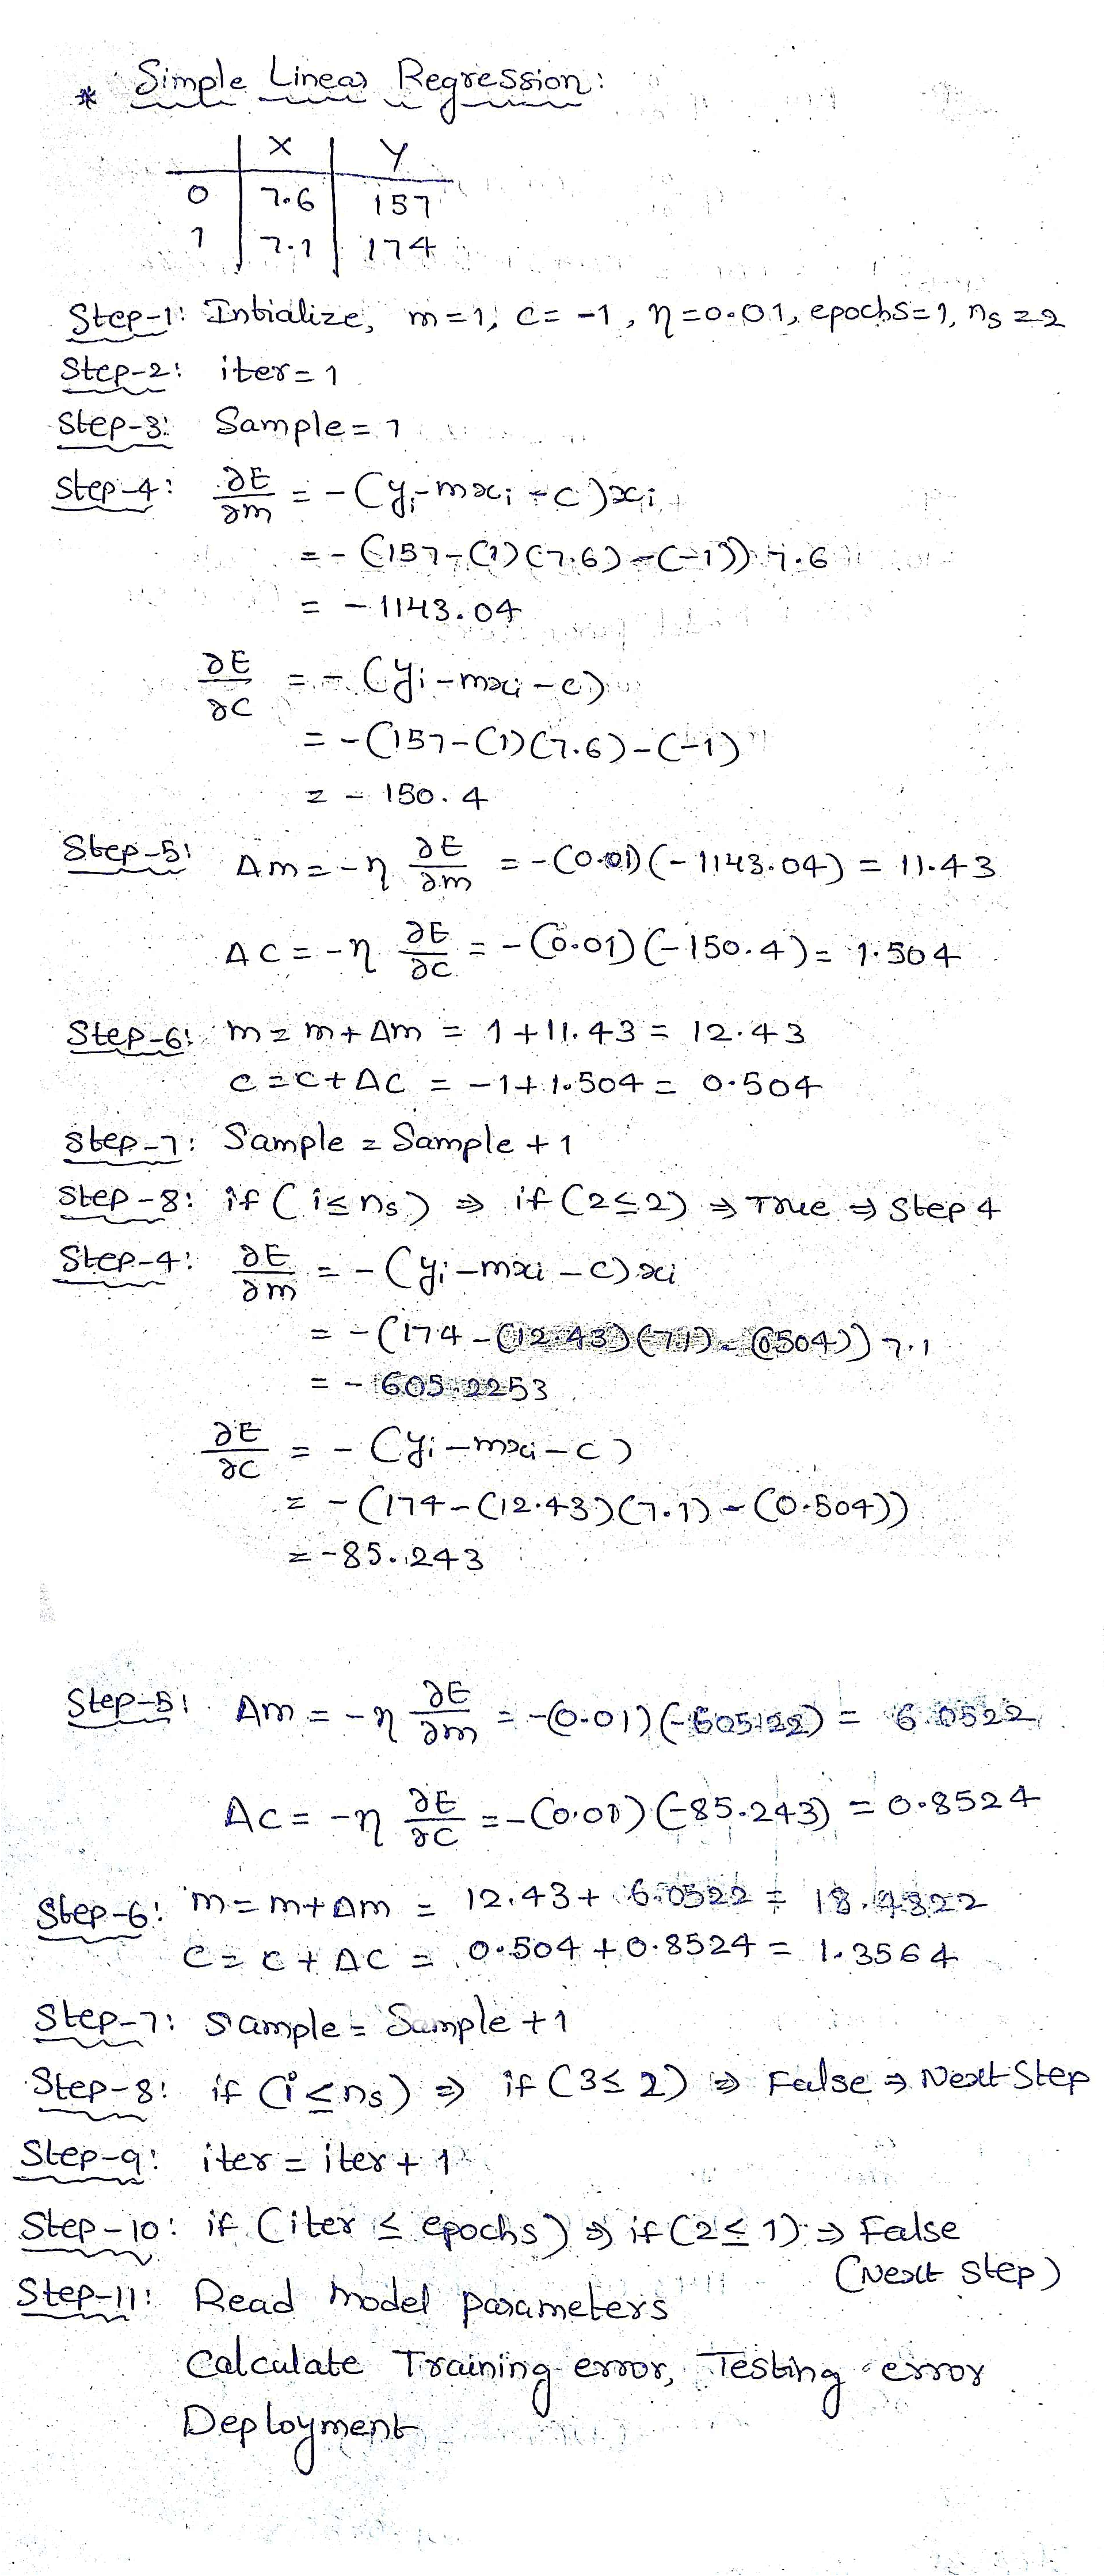

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import math as mt
import random
import pandas as pd

In [28]:
data = pd.read_csv('/content/drive/MyDrive/Data1.csv')
data.head()

X    Y
0  7.6  157
1  7.1  174
2  8.2  175
3  7.5  188
4  7.4  171

In [29]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers # Driver code

In [30]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in pH column from Z-scores method : ", sample_outliers_X)
print("Outliers in Bicarbonates column from Z-scores method : ", sample_outliers_Y)

Outliers in pH column from Z-scores method :  []
Outliers in Bicarbonates column from Z-scores method :  []


In [31]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [32]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

X    Y
0   7.6  157
1   7.1  174
2   8.2  175
3   7.5  188
4   7.4  171
5   7.8  143
6   7.3  217
7   8.0  190
8   7.1  142
9   7.5  190
10  8.1  215
11  7.0  199
12  7.3  262
13  7.8  105
14  7.3  121
15  8.0   81
16  8.5   82
17  7.1  210
18  8.2  202
19  7.9  155
20  7.6  157
21  8.8  147
22  7.2  133
23  7.9   53
24  8.1   56
25  7.7  113
26  8.4   35
27  7.4  125
28  7.3   76
29  8.5   48
30  7.8  147
31  6.7  117
32  7.1  182
33  7.3   87

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

In [34]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.001
max_iter=10000

In [35]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

In [36]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c
print('Model parameters m and c : ',m,c)

Model parameters m and c :  -27.308524431257744 346.2614767923796


In [37]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [38]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [40]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [41]:
#Training Accuracies
mse = mean_squared_error(y_train, y_pred_train) 
print('Mean Square Error : ', mse)
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root Mean Square Error : ', rmse)  
mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error : ', mae)

Mean Square Error :  2665.733484584732
Root Mean Square Error :  51.63074166216027
Mean Absolute Error :  44.496710044565205


In [42]:
#Testing Accuracies
mse = mean_squared_error(y_test, y_pred_test) 
print('Mean Square Error : ', mse) 
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root Mean Square Error : ', rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error : ', mae)

Mean Square Error :  3232.630740370725
Root Mean Square Error :  56.856228685788906
Mean Absolute Error :  52.25984421859587


In [43]:
X = input('Enter pH Value of Water : ')
Y = m*float(X)+c
print('Bicarbonates Value of Water : ',Y)

Enter pH Value of Water : 9.0
Bicarbonates Value of Water :  100.48475691105989
